# array
Plot array and return coordinates of each telescope

Author: Nik Korzoun

## Telescope Class

In [569]:
import numpy as np
from matplotlib import pyplot as plt

class telescope:
    
    def __init__(self, index, x, y):
        self.index = index
        self.x = x
        self.y = y

## Designs

### hexagonal

In [570]:
def hexagonal(rings=5,d=1.0):
    """Returns list of telescopes

    Keyword arguments:
    rings -- number of hexagonal rings (default 3)
    d -- intertelescope distance (default 1.0)
    """
    # array
    array = []

    # create telescopes and add to array
    n=1
    for i in range(rings):
        y = (np.sqrt(3)*i*d)/2.0
        for j in range(2*rings-i-1):
            x = (-(2*rings-i-2)*d)/2.0 + j*d;
            t = telescope(n,x,y)
            array.append(t)
            if (y!=0):
                n=n+1
                t = telescope(n,x,-y)
                array.append(t)
            n=n+1
    return array

### square

In [571]:
def square(length=5,d=1.0):
    """Returns list of telescopes

    Keyword arguments:
    length -- side length of square grid (default 5)
    d -- intertelescope distance (default 1.0)
    """
    # array
    array = []

    # create telescopes and add to array
    n=1
    for i in range(length):
        x = d * (i - (length-1)/2)
        for j in range(length):
            y = d * (j - (length-1)/2)
            t = telescope(n,x,y)
            array.append(t)
            n=n+1
    return array

### sunflower

In [572]:
def sunflower(number,d=1.0):
    """Returns list of telescopes

    Keyword arguments:
    number -- number of telescopes in pattern
    d -- intertelescope distance scaling factor (default 1.0)
    """
    # array
    array = []

    # create telescopes and add to array
    phi = (1+np.sqrt(5)) /2 #golden ratio
    
    n=1
    for i in range(number):
        theta = 2*np.pi*i/phi**2
        r = d*np.sqrt(i)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        t = telescope(n,x,y)
        array.append(t)
        n=n+1
    return array

## Plotting

In [573]:
def plot(design=hexagonal,out=False,label=False,**kwargs):
    """Plots a scatter plot of telescope positions
    and print corsika output for positions

    Keyword arguments:
    design -- function to generate shape of array
    **kwargs -- keyword arguments to pass to array design
    """
    fig = plt.figure(figsize=(10,10))
    array = design(**kwargs)
    x = [t.x for t in array]
    y = [t.y for t in array]
    n = [t.index for t in array]
    plt.scatter(x,y,s=200,marker='H',c='yellow',edgecolors='black');
    plt.axis('equal');
    for t in array:
        if label:
            plt.annotate(t.index,(t.x,t.y))
        if out:
            print('TELESCOPE {:.1f} {:.1f} 0. 25.'.format(100*t.x,100*t.y))
    print('number of telescopes:')
    print(len(array))

In [574]:
# approximate number of telescopes for each design
number = 25
# approximate intertelescope spacing
scale = 150

### hexagonal

number of telescopes:
19


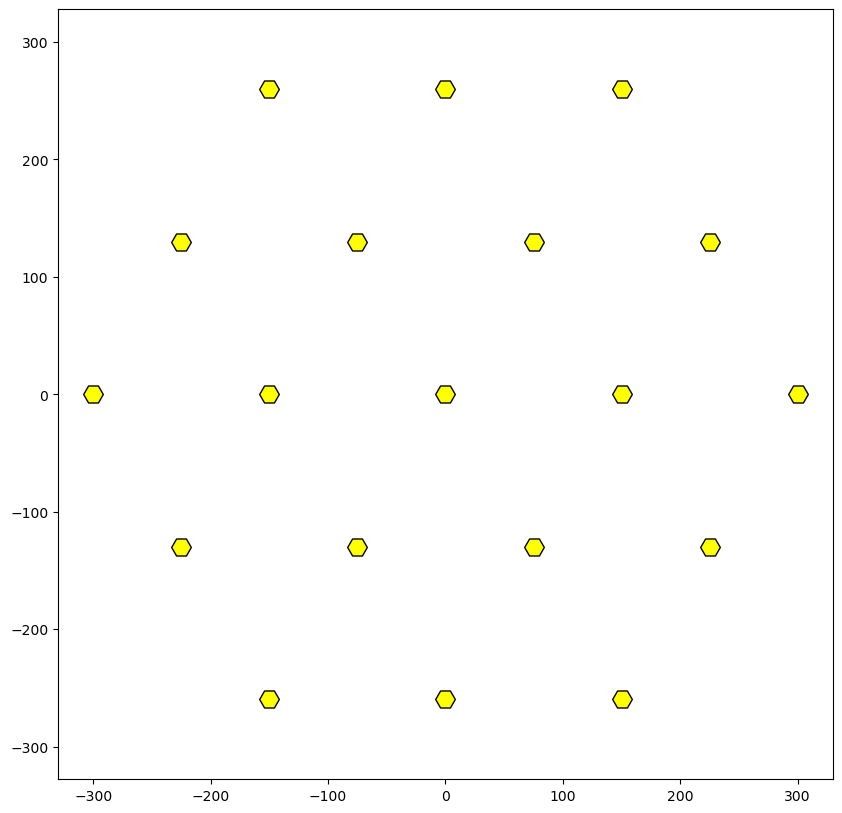

In [575]:
plot(hexagonal,rings=round(np.roots([3,3,1-number])[-1])+1,d=scale)

number of telescopes:
25


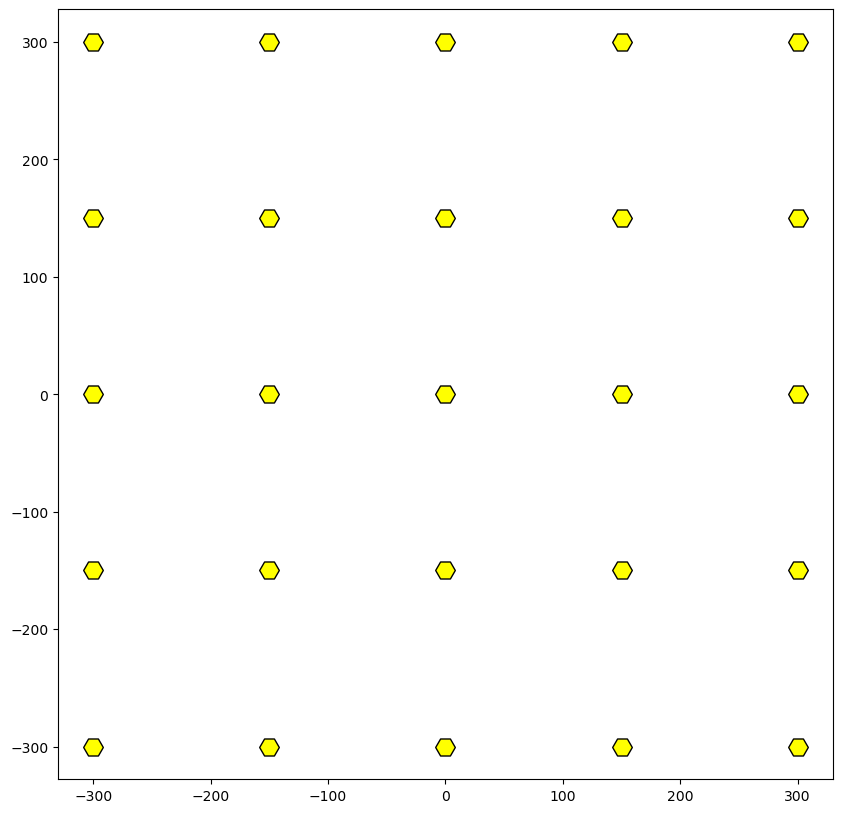

In [576]:
plot(square,length=round(np.sqrt(number)),d=scale)

number of telescopes:
25


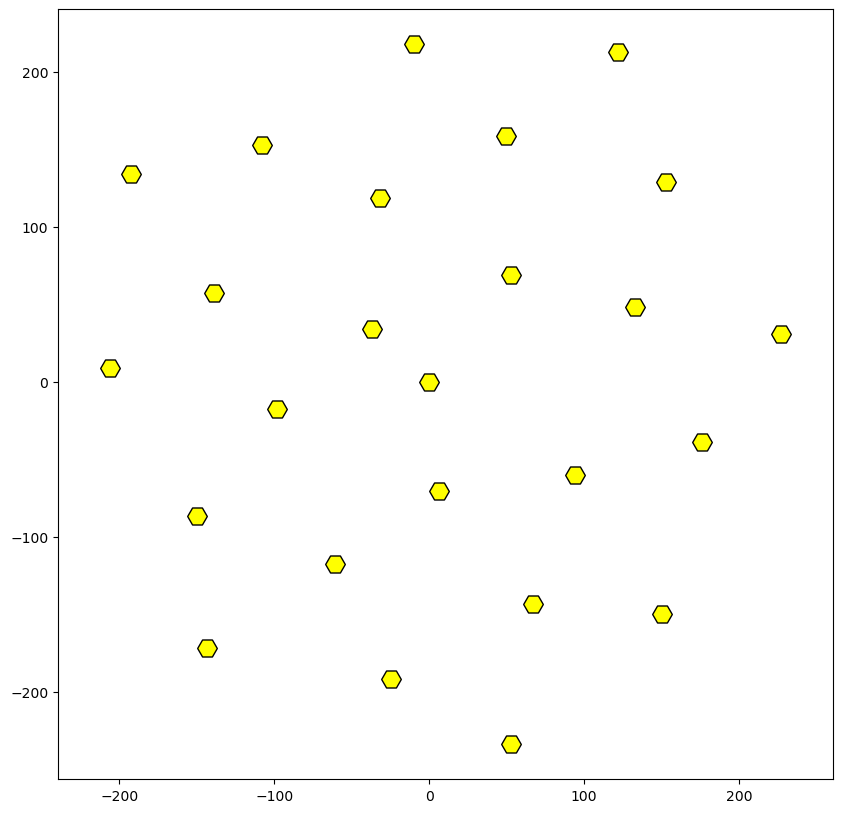

In [577]:
plot(sunflower,number=number,d=scale/3)